In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('data1')

# Convert 'Contract' to numeric values for clustering
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
data['ContractNumeric'] = data['Contract'].map(contract_mapping)

C:\Users\dhana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


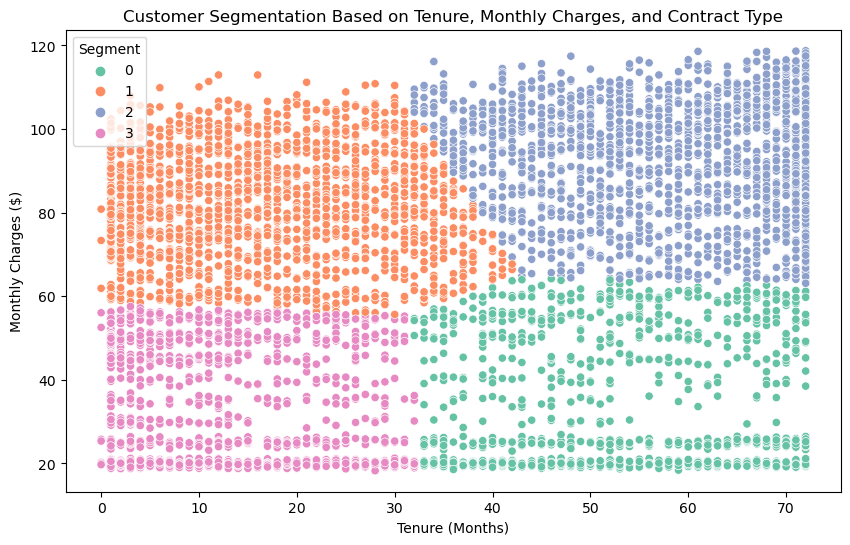

In [2]:
# 1. Segment Customers Based on Tenure, Monthly Charges, and Contract Type
X = data[['tenure', 'MonthlyCharges', 'ContractNumeric']]

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose the number of clusters (e.g., 4)
data['Segment'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges', hue='Segment', palette='Set2')
plt.title('Customer Segmentation Based on Tenure, Monthly Charges, and Contract Type')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges ($)')
plt.show()

Churn           No        Yes
Segment                      
0        95.229835   4.770165
1        50.869167  49.130833
2        84.073507  15.926493
3        75.472779  24.527221


<Figure size 1000x600 with 0 Axes>

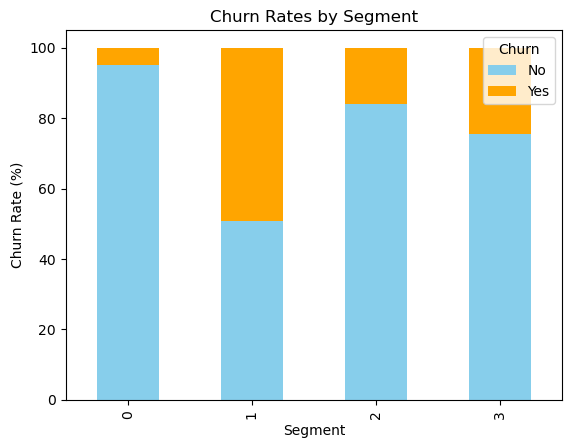

In [3]:
# 2. Analyze Churn Rates Within Segments
segment_churn_rates = data.groupby('Segment')['Churn'].value_counts(normalize=True).unstack() * 100
print(segment_churn_rates)

# Visualize churn rates by segment
plt.figure(figsize=(10, 6))
segment_churn_rates.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Churn Rates by Segment')
plt.xlabel('Segment')
plt.ylabel('Churn Rate (%)')
plt.show()

In [8]:
# Step 3.1: Identify high-churn segments correctly
high_churn_segments = segment_churn_rates[segment_churn_rates['Yes'] > 50].index

# Step 3.2: Ensure high-value customers are correctly identified
high_value_threshold = data['MonthlyCharges'].quantile(0.75)
high_value_customers = data[(data['MonthlyCharges'] > high_value_threshold)]

# Check if the high-churn segments and high-value customers have any overlap
high_value_at_risk = high_value_customers[high_value_customers['Segment'].isin(high_churn_segments)]

# If there are no high-value customers at risk, you might see an empty DataFrame or plot
if high_value_at_risk.empty:
    print("No high-value customers are at risk of churning in the high-churn segments.")
else:
    # Step 3.3: Visualize high-value customers at risk
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=high_value_at_risk, x='tenure', y='MonthlyCharges', hue='Segment', palette='Set1')
    plt.title('High-Value Customers at Risk of Churning')
    plt.xlabel('Tenure (Months)')
    plt.ylabel('Monthly Charges ($)')
    plt.show()

# Output high-value at-risk customers for further analysis
print(high_value_at_risk[['customerID', 'tenure', 'MonthlyCharges', 'Contract', 'Churn']])


No high-value customers are at risk of churning in the high-churn segments.
Empty DataFrame
Columns: [customerID, tenure, MonthlyCharges, Contract, Churn]
Index: []
